Electricity prices generally reflect the cost to build, finance, maintain, and operate power plants and the electricity grid (the complex system of power transmission and distribution lines). Some for-profit utilities also include a financial return for owners and shareholders in their electricity prices.

Several key factors influence the price of electricity:

# Fuels: Fuel costs can vary, especially during periods of high demand. High electricity demand can increase demand for fuel, such as natural gas, which can result in higher prices for the fuel and, in turn, higher costs to generate electricity.

Energt prices can be found on OASIS API as well using the same sraping procedure.

# Power plants (generation): Each power plant has construction, maintenance, and operating costs.

Generation data can be found on OASIS.

Transmission and distribution system: The electricity transmission and distribution systems that deliver electricity have maintenance costs, which include repairing damage to the systems from accidents or extreme weather conditions.

# Weather conditions: Rain and snow provide water for low-cost hydropower generation. Wind can provide low-cost electricity generation from wind turbines when wind speeds are favorable. However, extreme temperatures can increase the demand for electricity, especially for cooling, and demand can drive prices up.

Several API provide weather data based on cities/airports. Not sure which one is applicable.

Regulations: In some states, public service/utility commissions fully regulate prices, while other states have a combination of unregulated prices (for generators) and regulated prices (for transmission and distribution).

# Demand and supply data:

Forecasted demand can be found on CAISO as well.

# Pure Price Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
frames=[]
for i in ['20170301','20170401','20170501','20170515','20170601','20170701','20170715','20170801','20170815','20170901','20171001',
         '20171015','20171101','20171201','20180101','20180201']:
    df = pd.read_csv(i+'_hourly_prices.csv')
    frames.append(df)
result = pd.concat(frames)

C:\Users\DingR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [97]:
frames2=[]
for i in ['20160301','20160401','20160501','20160515','20160601','20160701','20160715','20160801','20160815','20160901','20161001',
         '20161015','20161101','20161201','20170101','20170201']:
    df2 = pd.read_csv(i+'_hourly_prices.csv')
    frames2.append(df2)
result2 = pd.concat(frames2)

C:\Users\DingR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [109]:
Dict2={}
for node in result2.keys():
    if node!='Timestamp':
        spread=[]
        cur=result2[node]
        for i in range(365):
            spread.append(max(cur[24*i:24*(i+1)])-min(cur[24*i:24*(i+1)]))
        Dict2[node]=spread


In [135]:
Df2=pd.DataFrame.from_dict(Dict2)

In [136]:
for node in Df2.keys():
    if Df2[node].isnull().values.any():
        Df2.drop([node],axis=1)

In [137]:
Df2.to_csv('Intraday_spread_16-17.csv',sep=',',index=True)

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
Df = pd.read_csv('Intraday_spread_17-18.csv')
Df.keys()

Index(['106THSO_LNODED1', '118THSO_LNODER1', '13THSO_LNODE-3',
       '13THSO_LNODED2', '23RDST_LNODED3', '26FTDROP_GNODEIT',
       '2C559EQ2_7_N001', '3RDWEST_LNODED1', '3RDWEST_LNODED2',
       '5THWEST_LNODED1',
       ...
       'YU_GNODEYUGT3', 'YU_GNODEYUGT4', 'YU_GNODEYUGT5', 'YU_GNODEYUGT6',
       'YU_GNODEYUST1', 'ZACA_1_N001', 'ZAMORA_1_N001', 'ZANKER_1_N001',
       'ZANKER_1_N003', 'Dates'],
      dtype='object', length=5973)

In [138]:
Df2 = pd.read_csv('Intraday_spread_16-17.csv')
Df2.keys()

Index(['Unnamed: 0', '106THSO_LNODED1', '118THSO_LNODER1', '13THSO_LNODE-3',
       '13THSO_LNODED2', '23RDST_LNODED3', '26FTDROP_GNODEIT',
       '2C559EQ2_7_N001', '3RDWEST_LNODED1', '3RDWEST_LNODED2',
       ...
       'YU_GNODEYUGT2', 'YU_GNODEYUGT3', 'YU_GNODEYUGT4', 'YU_GNODEYUGT5',
       'YU_GNODEYUGT6', 'YU_GNODEYUST1', 'ZACA_1_N001', 'ZAMORA_1_N001',
       'ZANKER_1_N001', 'ZANKER_1_N003'],
      dtype='object', length=5605)

In [141]:
Df2=Df2.drop([Df2.keys()[0]],axis=1)

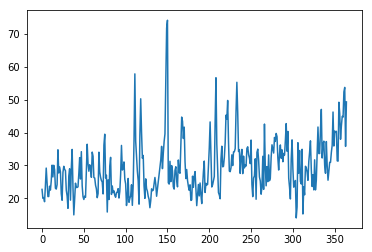

In [142]:
plt.plot(Df2[Df2.keys()[0]])

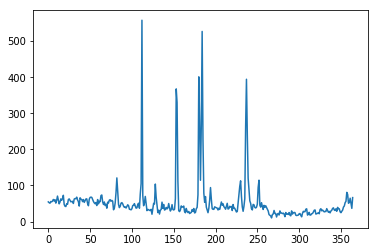

In [143]:
plt.plot(Df[Df.keys()[0]])

In [651]:
p=60
regr_p=regr_train(result,result.keys()[0:100],p)

0.851460296128854 0.8467916131802771


In [31]:
p=60
nn_p=nn_train(result,result.keys()[1:100],p,20,1000)

Epoch 1/20
661200/661200 [==============================] - 2s 3us/step - loss: 185.5959
Epoch 2/20
661200/661200 [==============================] - 1s 2us/step - loss: 62.5681
Epoch 3/20
661200/661200 [==============================] - 1s 2us/step - loss: 47.0025
Epoch 4/20
661200/661200 [==============================] - 1s 2us/step - loss: 39.6578
Epoch 5/20
661200/661200 [==============================] - 1s 2us/step - loss: 34.5885
Epoch 6/20
661200/661200 [==============================] - 1s 2us/step - loss: 31.6371
Epoch 7/20
661200/661200 [==============================] - 1s 2us/step - loss: 29.4010
Epoch 8/20
661200/661200 [==============================] - 1s 2us/step - loss: 27.2705
Epoch 9/20
661200/661200 [==============================] - 1s 2us/step - loss: 25.6724
Epoch 10/20
661200/661200 [==============================] - 1s 2us/step - loss: 24.6799
Epoch 11/20
661200/661200 [==============================] - 1s 2us/step - loss: 23.7728
Epoch 12/20
661200/661200 [==

Mean Percentage Error=0.15587904021446483


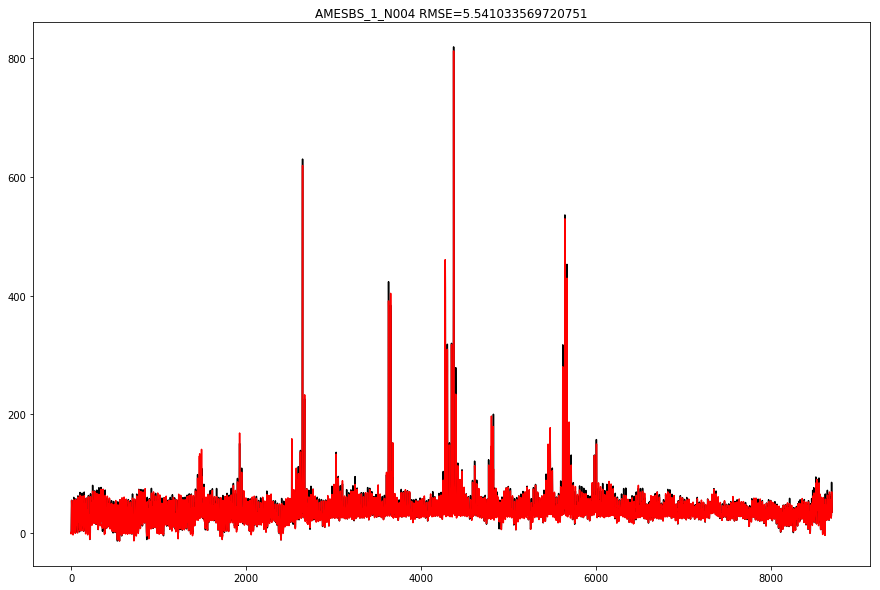

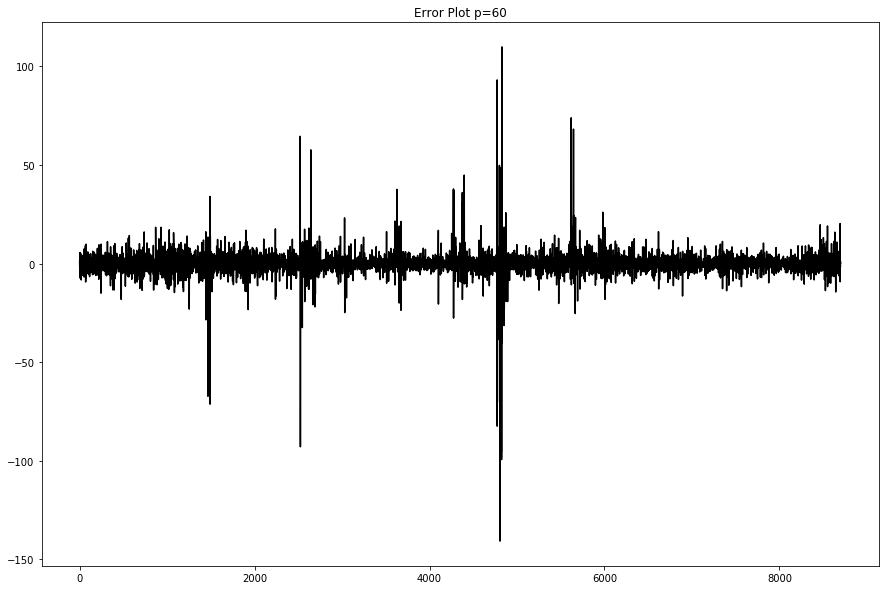

In [32]:
from sklearn.metrics import mean_squared_error
p=60
nn_generalize(result,nn_p,result.keys()[121],p)

Predicting next day spread using current price sequence doesn't show much effect

In [642]:
size=1000
dat=np.zeros((364*size,25))
for i in range(size):
    
    col=result.keys()[i]
    if np.isnan(result[col]).any() or np.isnan(Df[col]).any():
        pass
    else:
        dat[i*364:(i+1)*364,0:24]=np.array(result[col]).reshape((365,24))[0:-1,:]
    
        y=np.array(Df[col])[1:]
        dat[i*364:(i+1)*364,24]=y
np.random.shuffle(dat)
X_train,X_test=dat[0:int(364*size*0.8),0:24],dat[int(364*size*0.8):,0:24]
y_train,y_test=dat[0:int(364*size*0.8),24],dat[int(364*size*0.8):,24]

In [643]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
print(regr.score(X_train,y_train),regr.score(X_test,y_test))

0.4161480815633892 0.4063565711220224


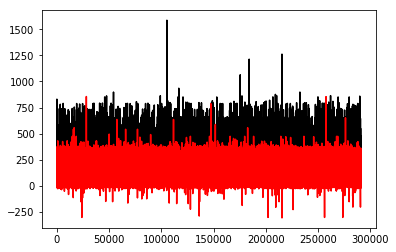

In [644]:
y_p=regr.predict(X_train)
y_pred=regr.predict(X_test)
plt.plot(y_train,'k')
plt.plot(y_p,'r')

# Working with Intraday Spread data

In [3]:
means=[]
Vars=[]
for i in Df.keys()[:-1]:
    a=np.array(Df[i])
    a=a[np.isfinite(a)]
    means.append(np.mean(a))
    Vars.append(np.std(a)**2)

In [4]:
mu=np.mean(means)
sig=np.sqrt(np.mean(Vars))

In [5]:
mu,sig

(56.964981024456584, 64.28949162267601)

In [6]:
thres=mu+3*sig

# KEY FUNCTIONS

In [63]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
import numpy




In [150]:
def nn_train(Df,dataset,p,epoch,b_s):
    data=[]
    for j in dataset:
        
        ts = Df[j]
        
        ts = np.array(ts)

       
        if sum(np.isnan(ts))==0:
            data+=[ts[i:i+p+1] for i in range(len(ts)-p)]
       
    #np.random.shuffle(data)
    data=np.array(data)
    size=int(len(data)*0.8)
    train, test = data[0:size,:], data[size:len(data),:]
    X_train,X_test=train[:,0:p],test[:,0:p]
    y_train,y_test=train[:,p],test[:,p]
    model=Sequential()
   
    model.add(Dense(30, input_dim=p, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    # Fit the model
    model.fit(X_train, y_train, epochs=epoch, batch_size=b_s)
# evaluate the model
    scores = model.evaluate(X_test, y_test)
   
    return model
def nn3_train(Df,dataset,p,epoch,b_s):
    data=[]
    for j in dataset:
        
        ts = Df[j]
        
        ts = np.array(ts)

       
        if sum(np.isnan(ts))==0:
            data+=[ts[i:i+p+1] for i in range(len(ts)-p)]
       
    #np.random.shuffle(data)
    data=np.array(data)
    size=int(len(data)*0.8)
    train, test = data[0:size,:], data[size:len(data),:]
    X_train,X_test=train[:,0:p],test[:,0:p]
    y_train,y_test=train[:,p],test[:,p]
    model=Sequential()
   
    model.add(Dense(100, input_dim=p, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    # Fit the model
    model.fit(X_train, y_train, epochs=epoch, batch_size=b_s)
# evaluate the model
    scores = model.evaluate(X_test, y_test)
   
    return model
def nn_generalize(Df,regr,dataset,p):
    ts=Df[dataset]
    ts = np.array(ts)

   
    data=np.array([ts[i:i+p+1] for i in range(len(ts)-p)])
#np.random.shuffle(data)
    X_out,y_out=data[:,0:p],data[:,p]
    y_val=np.array(regr.predict(X_out)).reshape(1,-1)[0]
    #print(y_val,y_out)
    plt.figure(figsize=(15,10))
    plt.plot(y_out,'k')
    plt.plot(y_val,'r')
    plt.title(dataset+' RMSE='+str(np.sqrt(mean_squared_error(y_val,y_out))))
    plt.figure(figsize=(15,10))
    error=y_out-y_val
    plt.plot(error,'k')
    plt.title('Error Plot p='+str(p))
    print('Mean Percentage Error='+str(np.sqrt(mean_squared_error(y_out,y_val))/np.mean(y_val)))
def regr_train(Df,dataset,p):
    data=[]
    for j in dataset:
        
        ts = Df[j]
        
        ts = np.array(ts)

        ret = np.diff(ts)
        rr=np.diff(ret)
        rrr=list(np.diff(rr))
        if sum(np.isnan(rrr))==0:
            data+=[rrr[i:i+p+1] for i in range(len(rrr)-p)]
       
    #np.random.shuffle(data)
    data=np.array(data)
    size=int(len(data)*0.8)
    train, test = data[0:size,:], data[size:len(data),:]
    X_train,X_test=train[:,0:p],test[:,0:p]
    y_train,y_test=train[:,p],test[:,p]
    regr = linear_model.LinearRegression()
    regr.fit(X_train,y_train)
    print(regr.score(X_train,y_train),regr.score(X_test,y_test))
    return regr
def regr_generalize(Df,regr,dataset,p):
    ts=Df[dataset]
    ts = np.array(ts)

    ret = np.diff(ts)
    rr=np.diff(ret)
    rrr=np.diff(rr)
    data=np.array([rrr[i:i+p+1] for i in range(len(rrr)-p)])
#np.random.shuffle(data)
    X_out,y_out=data[:,0:p],data[:,p]
    y_val=np.array(regr.predict(X_out)).reshape(1,-1)[0]
    #print(y_val,y_out)
    plt.figure(figsize=(15,10))
    plt.plot(y_out,'k')
    plt.plot(y_val,'r')
    plt.title('3rd Diff RMSE='+str(np.sqrt(mean_squared_error(y_val,y_out))))
    plt.figure(figsize=(15,10))
    
    rr_p=rr[p:-1]+y_val
    #print(rr[p+1:],rr_p)
    plt.plot(rr[p+1:],'k')
    plt.plot(rr_p,'r')
    plt.title('2nd Diff RMSE='+str(np.sqrt(mean_squared_error(rr_p,rr[p+1:]))))
    plt.figure(figsize=(15,10))
    ret_p=ret[p+1:-1]+rr_p
    plt.plot(ret[p+2:],'k')
    plt.plot(ret_p,'r')
    plt.title('1st Diff RMSE='+str(np.sqrt(mean_squared_error(ret_p,ret[p+2:]))))
    plt.figure(figsize=(15,10))
    ts_p=ts[p+2:-1]+ret_p
    plt.plot(ts[p+3:],'k')
    plt.plot(ts_p,'r')
    plt.title(dataset+' Original RMSE='+str(np.sqrt(mean_squared_error(ts_p,ts[p+3:]))))
    plt.figure(figsize=(15,10))
    error=ts[p+3:]-ts_p
    plt.plot(error,'k')
    plt.title('Error Plot p='+str(p))
    print('Mean Percentage Error='+str(np.sqrt(mean_squared_error(ts_p,ts[p+3:]))/np.mean(ts[p+3:])))

# Spike Identification

In [10]:
%matplotlib inline
def spike_plot(Df,node,thres):
    plt.figure(figsize=(15,10))
    ts = np.array(Df[node])
    #print(ts)
    for i in range(len(ts)):
        if ts[i]>thres:
            plt.plot(i,ts[i],'ro')

    
    plt.plot(ts)
    plt.plot(np.ones(len(ts))*thres,'r')
    plt.title(node)

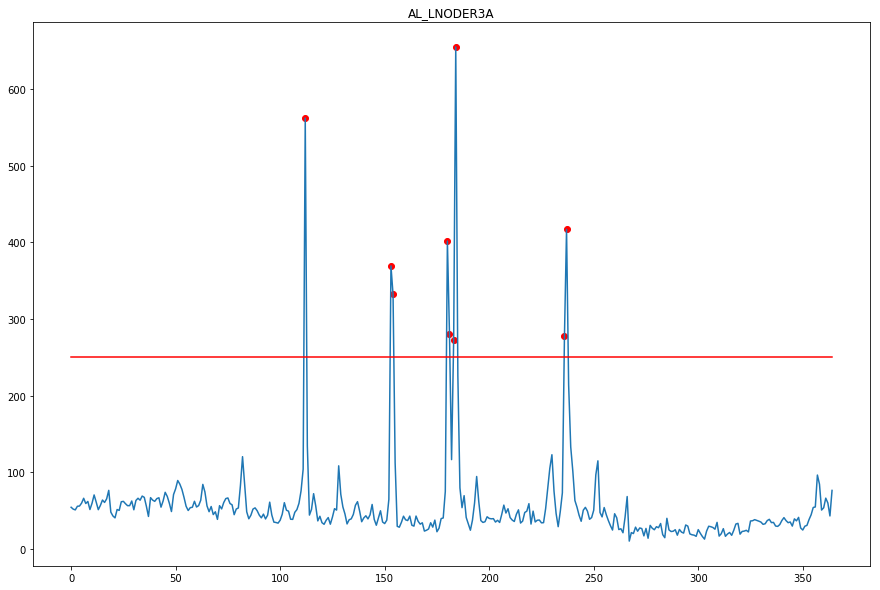

In [11]:
spike_plot(Df,Df.keys()[118],thres)

The following section does a second order differencing on the original time series and fits an AR model onto it.

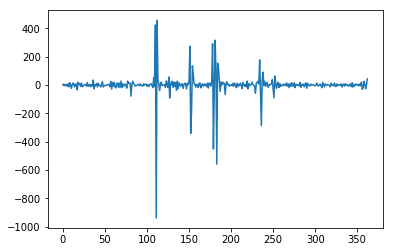

In [35]:
ts=Df[Df.keys()[0]]
ts = np.array(ts)

ret = np.diff(ts)
rr=np.diff(ret)
rrr=np.diff(rr)

plt.plot(rr)

In [36]:
len(ts),len(ret),len(rr),len(rrr)

(365, 364, 363, 362)

# Year Ahead Prediction Based on Simulation

In [81]:
from statsmodels.tsa.arima_model import ARIMA
from random import random
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

p=120
data = np.array([ts[i:i+p+1] for i in range(len(ts)-p)])

X_test,y_test=data[:,0:p],data[:,p]



In [ ]:
p=120

nn2=nn2_train(Df,Df.keys()[1:-1],p,15,1000)

In [90]:
x_test=np.array(ts[0:p])
y_test=np.array(ts[p:2*p])
y_pred=nn2.predict(np.array([x_test]))[0]

RMSE=8.123062967580513


Text(0.5, 1.0, 'Prediction based on seq2seq')

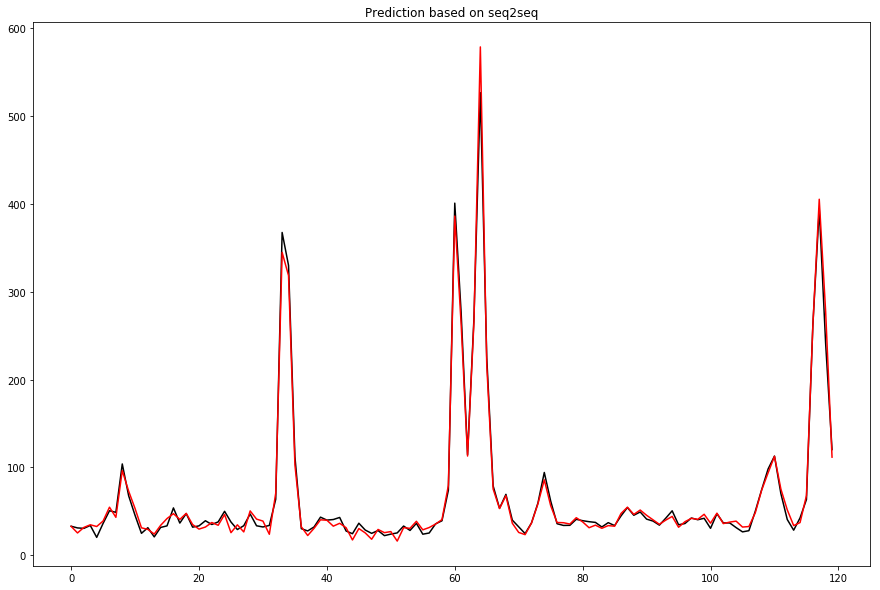

In [91]:
plt.figure(figsize=(15,10))
print('RMSE='+str(np.sqrt(mean_squared_error(y_pred,y_test))))
plt.plot(y_test,'k')
plt.plot(y_pred,'r')
plt.title('Prediction based on seq2seq')

RMSE=2.26078892694721


Text(0.5, 1.0, 'Prediction based on daily monitoring')

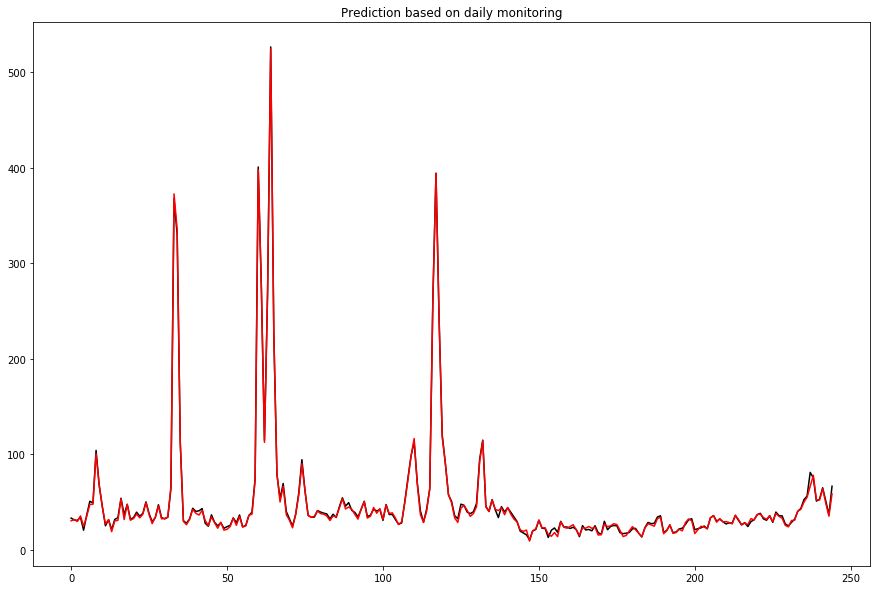

In [60]:

y_pred=nn.predict(X_test)
print('RMSE='+str(np.sqrt(mean_squared_error(y_pred,y_test))))
plt.figure(figsize=(15,10))
plt.plot(y_test,'k')
plt.plot(y_pred,'r')
plt.title('Prediction based on daily monitoring')

Using a simulation method will dimiinsh our predicted initial volatility signal over the time of the forecasting period and yields undesirable results
with the ARIMA model due to its error accumulation and diminishing volatility over time. But with our refined neural network model, the prediction accuracy
at the beginning period becomes very high so that we can ideally simulate the entire year ahead price spread sequence by a rolling prediction method.

RMSE=5.472996916394777
Mean Percentage Error=0.11040628503397988


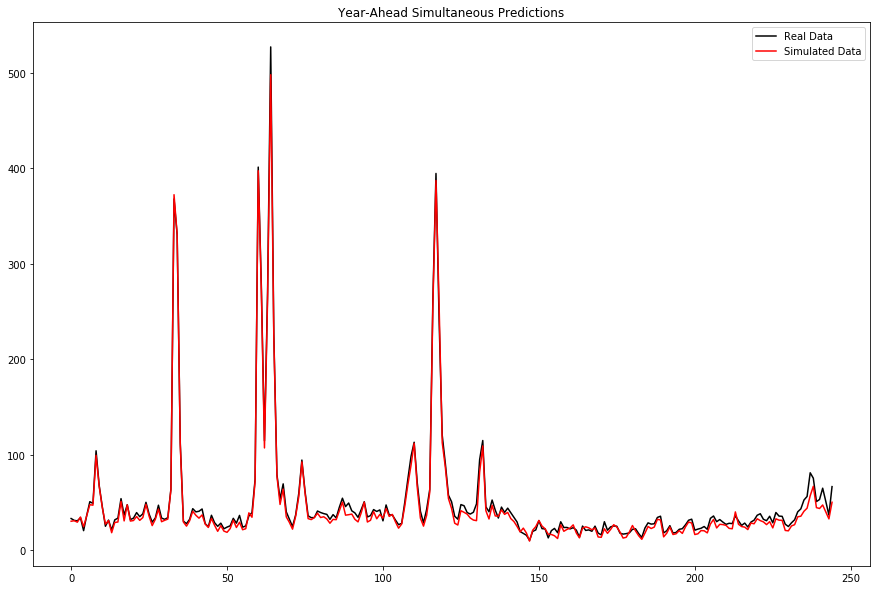

In [72]:
simulate(nn,X_test,y_test,0)

In [71]:
def simulate(regr,X_test,y_test,index):
    y_out=[]
    X_cur=X_test[index,:]
    while len(y_out)<(len(y_test)-index):
        y_p=regr.predict(X_cur.reshape(1,-1))[0]
        X_new=np.zeros(len(X_cur))
        X_new[0:-1]=X_cur[1:]
        X_new[-1] = y_p
        X_cur=X_new
        y_out.append(y_p)
    print('RMSE='+str(np.sqrt(mean_squared_error(y_out,y_test[index:]))))
    print('Mean Percentage Error='+str(np.sqrt(mean_squared_error(y_out,y_test[index:]))/np.mean(y_test[index:])))
    plt.figure(figsize=(15,10))
    plt.plot(y_test[index:],'k',label='Real Data')
    plt.plot(y_out,'r',label='Simulated Data')
    plt.title('Year-Ahead Simultaneous Predictions')
    plt.legend()

In [77]:
def nn2_train(Df,dataset,p,epoch,b_s):
    data=[]
    for j in dataset:
        
        ts = Df[j]
        
        ts = np.array(ts)

       
        if sum(np.isnan(ts))==0:
            data+=[ts[i:i+p*2] for i in range(len(ts)-2*p+1)]
       
    #np.random.shuffle(data)
    data=np.array(data)
    size=int(len(data)*0.8)
    train, test = data[0:size,:], data[size:len(data),:]
    X_train,X_test=train[:,0:p],test[:,0:p]
    y_train,y_test=train[:,p:],test[:,p:]
    model=Sequential()
   
    model.add(Dense(100, input_dim=p, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(p))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    # Fit the model
    model.fit(X_train, y_train, epochs=epoch, batch_size=b_s)
# evaluate the model
    model.evaluate(X_test, y_test)
   
    return model

# Neural Net Training

In [163]:
p=60

nn3=nn3_train(Df2,Df2.keys()[1:-1],p,15,1000)

Epoch 1/15
887916/887916 [==============================] - 4s 5us/step - loss: 228.6290
Epoch 2/15
887916/887916 [==============================] - 3s 4us/step - loss: 205.7351
Epoch 3/15
887916/887916 [==============================] - 3s 4us/step - loss: 196.5634
Epoch 4/15
887916/887916 [==============================] - 3s 3us/step - loss: 188.2427
Epoch 5/15
887916/887916 [==============================] - 3s 3us/step - loss: 180.2653
Epoch 6/15
887916/887916 [==============================] - 3s 3us/step - loss: 172.1576
Epoch 7/15
887916/887916 [==============================] - 3s 3us/step - loss: 163.5418
Epoch 8/15
887916/887916 [==============================] - 3s 3us/step - loss: 155.5625
Epoch 9/15
887916/887916 [==============================] - 3s 3us/step - loss: 149.9239
Epoch 10/15
887916/887916 [==============================] - 3s 3us/step - loss: 146.3836
Epoch 11/15
887916/887916 [==============================] - 3s 3us/step - loss: 143.6642
Epoch 12/15
887916/

Mean Percentage Error=1.2071670287765988


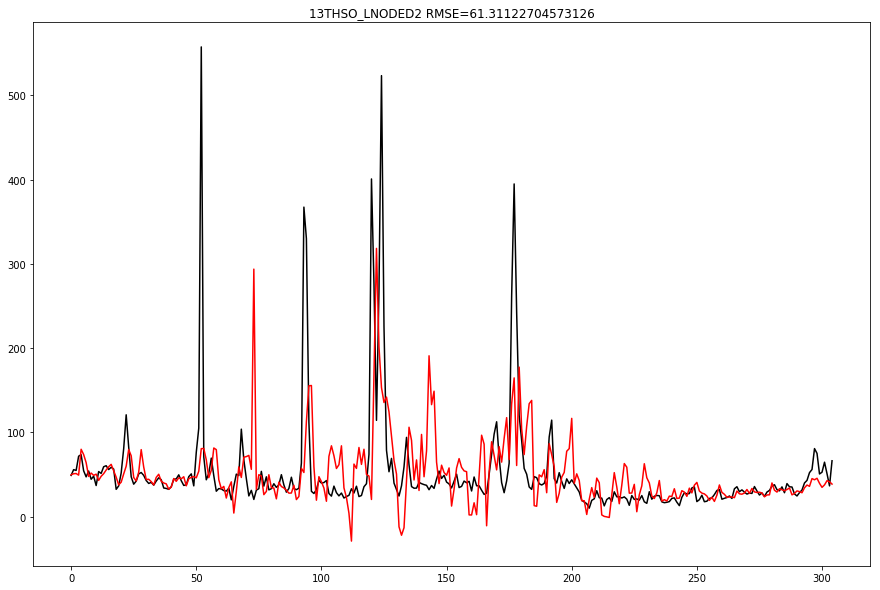

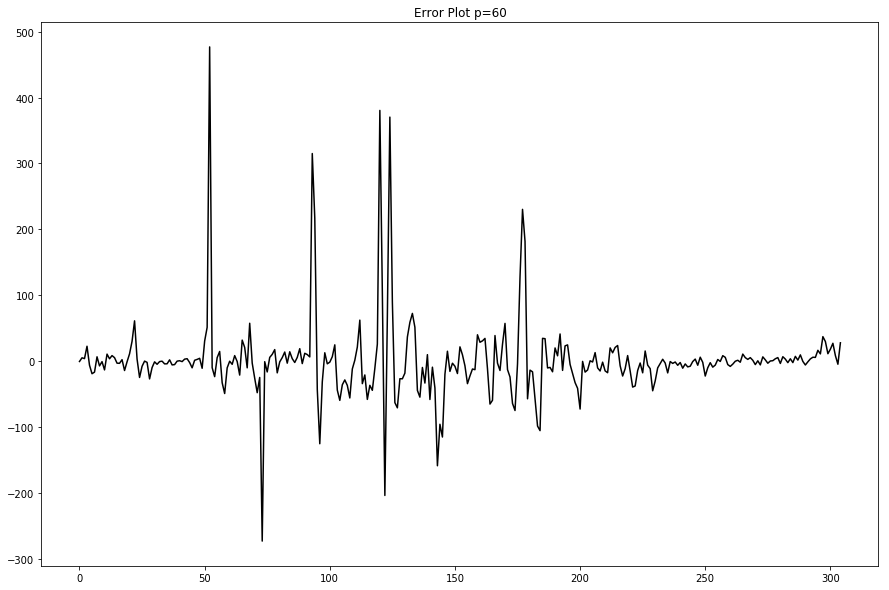

In [164]:
nn_generalize(Df,nn3,Df.keys()[3],p)

In [29]:
p=120
nn=nn_train(Df,Df.keys()[1:-1],p,15,100)

Epoch 1/15
1051344/1051344 [==============================] - 19s 18us/step - loss: 229.7791
Epoch 2/15
1051344/1051344 [==============================] - 11s 10us/step - loss: 118.5947
Epoch 3/15
1051344/1051344 [==============================] - 11s 10us/step - loss: 100.9165
Epoch 4/15
1051344/1051344 [==============================] - 11s 10us/step - loss: 90.3417
Epoch 5/15
1051344/1051344 [==============================] - 11s 10us/step - loss: 84.0698
Epoch 6/15
1051344/1051344 [==============================] - 11s 10us/step - loss: 78.7411
Epoch 7/15
1051344/1051344 [==============================] - 11s 10us/step - loss: 74.3519
Epoch 8/15
1051344/1051344 [==============================] - 11s 10us/step - loss: 70.9350
Epoch 9/15
1051344/1051344 [==============================] - 11s 10us/step - loss: 68.5969
Epoch 10/15
1051344/1051344 [==============================] - 11s 11us/step - loss: 66.7493
Epoch 11/15
1051344/1051344 [==============================] - 11s 10us/step

Mean Percentage Error=0.04621027317295453


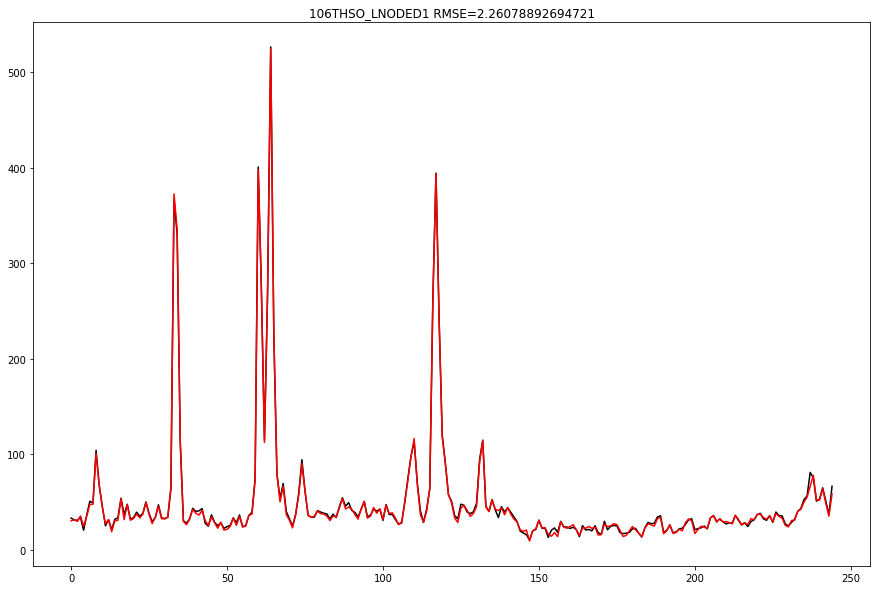

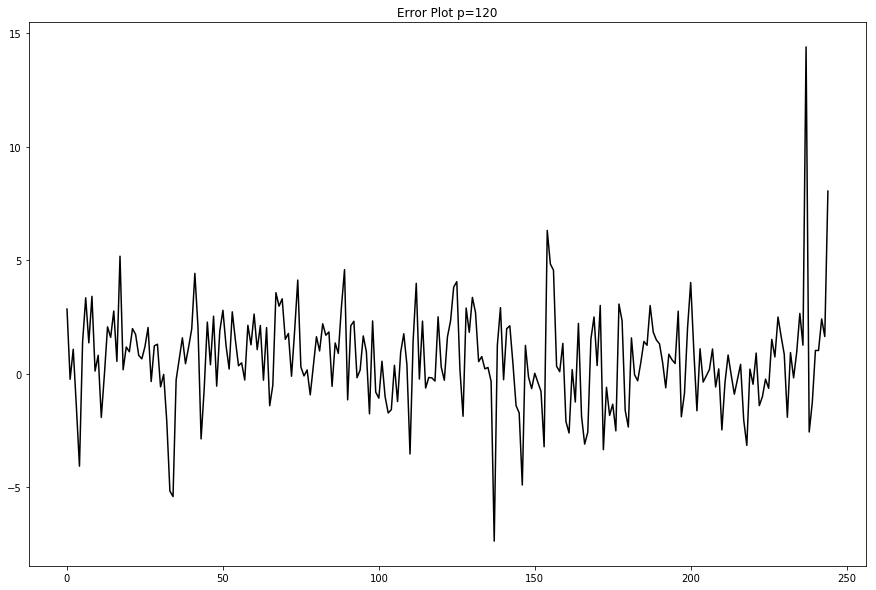

In [30]:
nn_generalize(Df,nn,Df.keys()[0],p)

In [519]:
p=60
regr3=regr_train(Df,Df.keys()[:-1],p)

0.8840431009868056 0.8839399711496363


Mean Percentage Error=0.9596345755159846


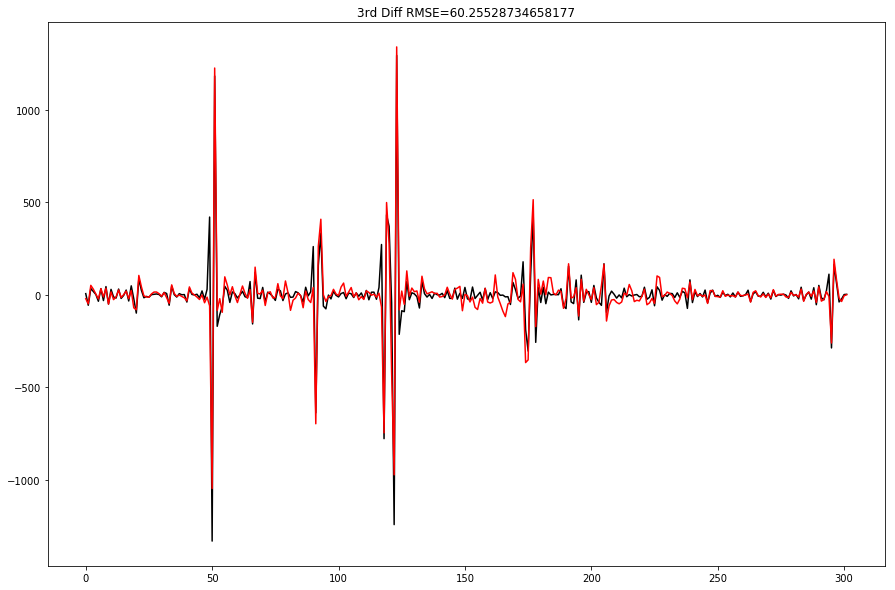

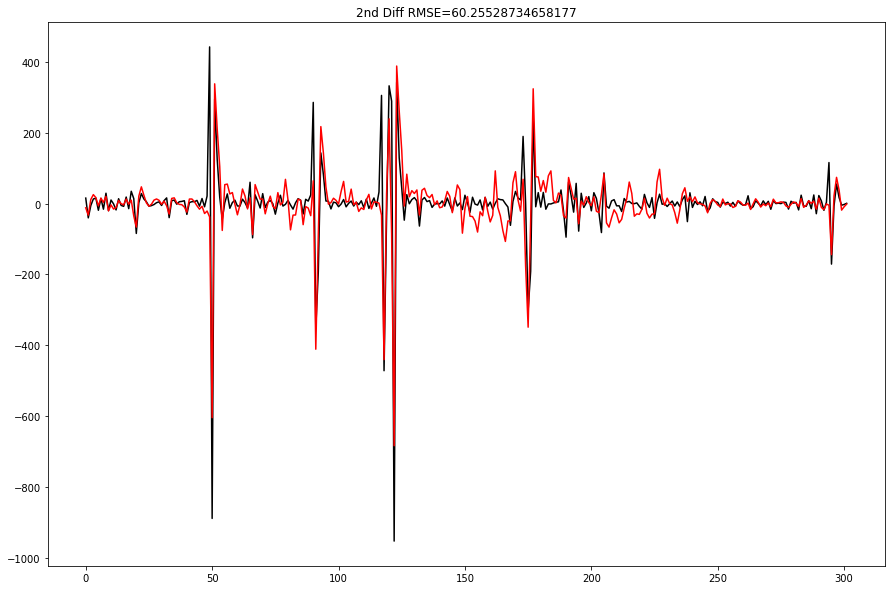

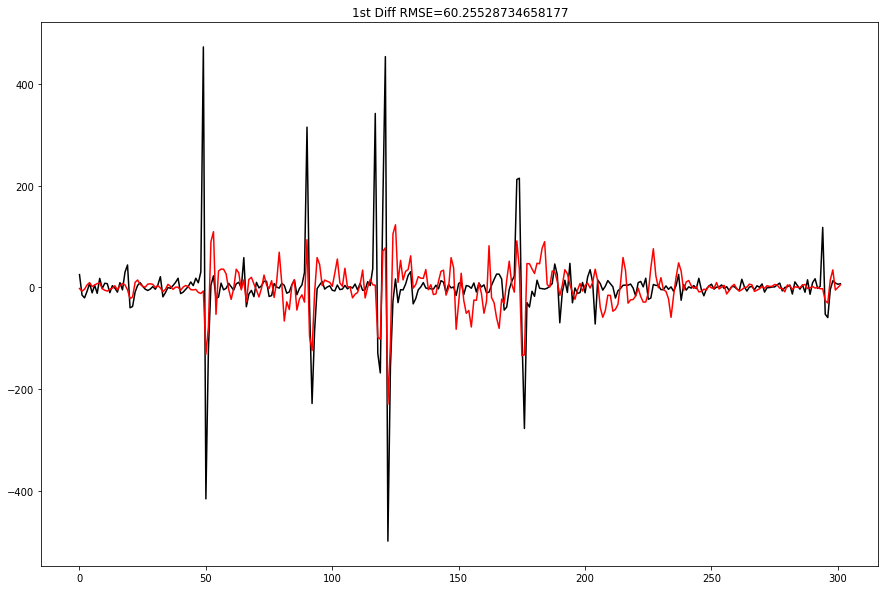

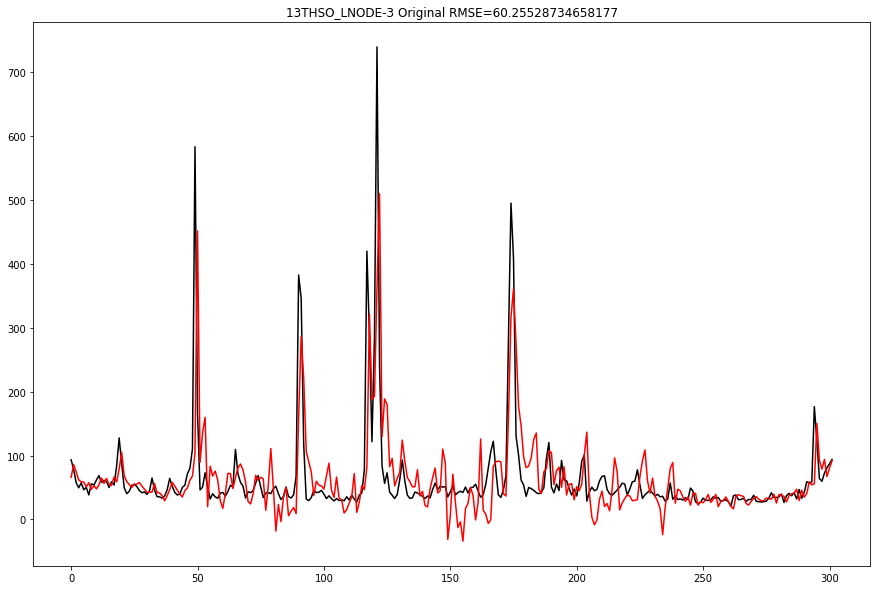

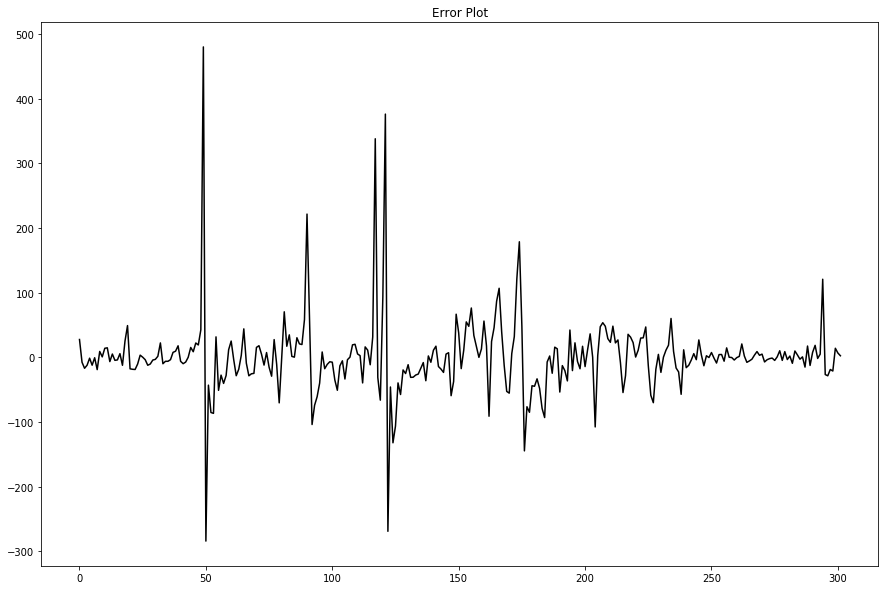

In [766]:
regr_generalize(Df,regr2,Df.keys()[2],p)

### It's clear that the simple ANN structure beats the ARIMA model on testing data with a much smaller error. 

Fitting an ARIMA model iteratively

C:\Users\DingR\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\DingR\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\DingR\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` 

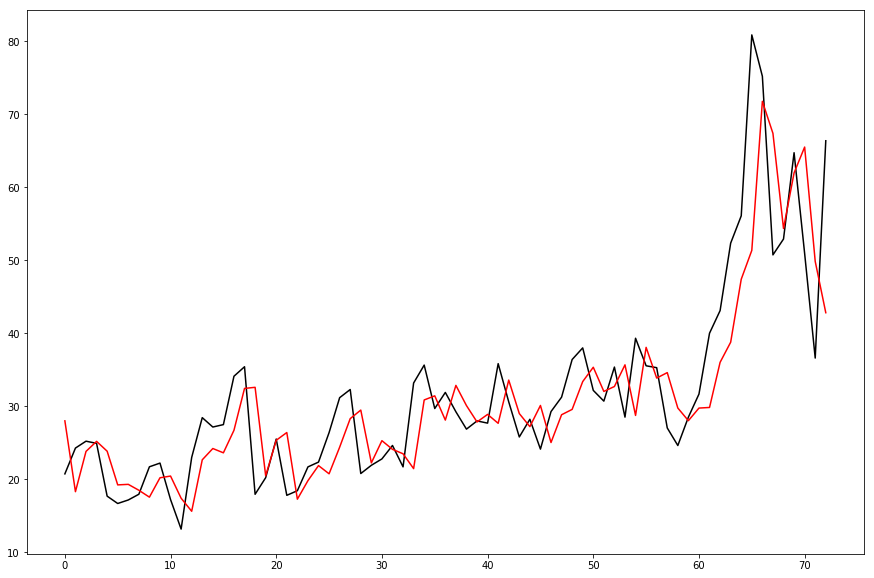

In [108]:
from statsmodels.tsa.arima_model import ARIMA
from random import random
from sklearn.metrics import mean_squared_error
# contrived dataset
size=int(len(ts)*0.8)
train, test = ts[0:size], ts[size:len(ts)]
history = [x for x in train]
predicted=[x for x in train]

for t in range(len(test)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predicted.append(yhat)
    obs = test[t]
    history.append(obs)
plt.figure(figsize=(15,10))
plt.plot(ts[size:],'k')
plt.plot(predicted[size:],'r')

In [109]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predicted[size:])
error

55.641333652512735

In [55]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ret)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.835503
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
